In [26]:
import pgmpy
import pandas as pd
import matplotlib.pyplot as plt
#import dataset
data=pd.read_csv("spotifyData.csv")
#drop first column
data=data.drop(data.columns[0],axis=1)
data.head()

,danceability,energy,loudness,acousticness,instrumentalness,valence,tempo,genre,like
0,0.754,0.813,-5.400,0.071,0.00007,0.955,98.457,4,1
1,0.546,0.793,-5.753,0.334,0.37800,0.516,104.161,11,1
2,0.212,0.561,-14.217,0.800,0.00457,0.257,76.257,11,1
3,0.504,0.934,-6.802,0.536,0.84500,0.897,117.850,11,1
4,0.667,0.519,-14.370,0.329,0.42100,0.604,99.526,9,1


In [19]:
#create model in pgmpy
from pgmpy.models import BayesianModel

Creating a custom model based on the description of variables from the API's documentation, and personal intuition.

In [20]:
no_genre_data = data.drop(['genre'], axis=1)
custom_model = BayesianModel([('loudness', 'energy'), ('tempo', 'energy'),
                                ('energy', 'valence'), ('danceability', 'valence'),
                              ('valence', 'like'), ('acousticness', 'like'),('instrumentalness', 'like')])


/home/danielenapo/.local/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


Learn parameters

In [21]:
from pgmpy.estimators import MaximumLikelihoodEstimator
custom_model.fit(no_genre_data, estimator=MaximumLikelihoodEstimator)

## Inference

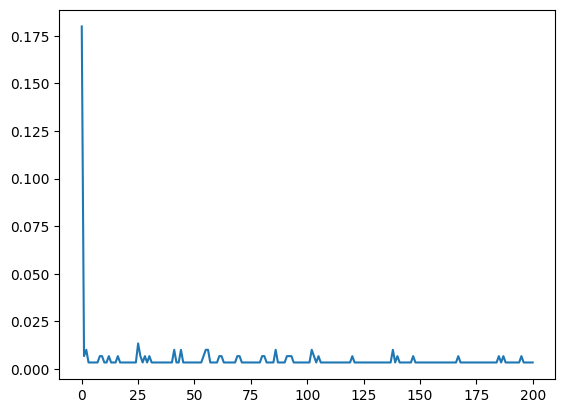

In [28]:
# make inference
from pgmpy.inference import VariableElimination
infer = VariableElimination(custom_model)
# query for the probability of a song being instrumental given that it is liked
q = infer.query(variables=['instrumentalness'], evidence={'like': 1})
# plot the probability distribution
plt.plot(q.values)

In [29]:
print(q)

+----------------------------+-------------------------+
| instrumentalness           |   phi(instrumentalness) |
+============================+=========================+
| instrumentalness(0.0)      |                  0.1799 |
+----------------------------+-------------------------+
| instrumentalness(1.03e-06) |                  0.0067 |
+----------------------------+-------------------------+
| instrumentalness(1.23e-06) |                  0.0100 |
+----------------------------+-------------------------+
| instrumentalness(1.31e-06) |                  0.0033 |
+----------------------------+-------------------------+
| instrumentalness(1.65e-06) |                  0.0033 |
+----------------------------+-------------------------+
| instrumentalness(1.72e-06) |                  0.0033 |
+----------------------------+-------------------------+
| instrumentalness(1.8e-06)  |                  0.0033 |
+----------------------------+-------------------------+
| instrumentalness(1.81e-06) | 